In [1]:
import os
import numpy as np
import tqdm
from datetime import datetime
import pickle
from IPython.display import HTML
np.random.seed(420)

import multiprocessing
n_cores = multiprocessing.cpu_count()
print(f"num cores: {n_cores}")
from multiprocessing import Pool
from functools import partial

from HMM import unsupervised_HMM, from_hmm
from helper import (
    animate_emission,
    states_to_wordclouds,
    parse_seqs,
    parse_text,
    update_syll_map,
    sample_sentence,
    visualize_sparsities,
    rhyme_dict_gen,
    get_stats
)

num cores: 4


# Preprocessing

In [2]:
with open(os.path.join(os.getcwd(), 'data/shakespeare.txt'), 'r') as f:
    text = f.read()

with open(os.path.join(os.getcwd(), 'data/Syllable_dictionary.txt'), 'r') as f:
    syll_map0 = {}
    for i, line in enumerate(f):
        line = line.strip().split()
        word = line[0] 
        # Add 10 to denote end of line syll_count
        sylls = np.array([int(s.replace('E', '1')) for s in line[1:]])
        assert(word not in syll_map0)
        syll_map0[word] = sylls

## Get maps and other relevant preprocessing data

In [3]:
by = 'line'
seqs = parse_text(text, by=by)
obs, obs_map = parse_seqs(seqs)
syll_map = update_syll_map(syll_map0, obs_map)
rhyme_d = rhyme_dict_gen(text, connected=False, with_words=False)

## Train single HMM

In [5]:
hmm = unsupervised_HMM(10, obs, 1, verbose=True)

fName = datetime.today().strftime('%y%m%d_%H%M') + f"_hmm{hmm.L}.pkl"
with open(fName, 'wb') as f:
    pickle.dump(hmm, f)


100%|██████████| 1/1 [00:03<00:00,  3.30s/it]


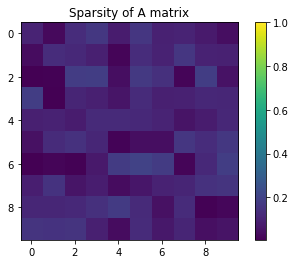

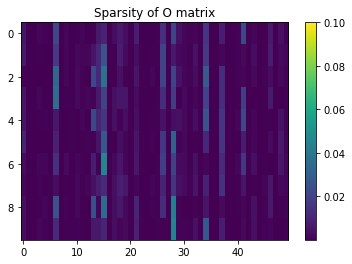

Sample Sentence:
For the call the may as now but her case and some change the of still your high should my then o main still closet...



Sample Sonnet:
Dignity affairs so make controlling,
Saw in by thoughts friend's thy day eloquence,
Now mak'st thou even and that 'tis he rolling,
But all true have this friends me recompense,
Yet i to i but will hours my gaze hearts,
For purity limits young on anew,
In pine thee when in visage do thy parts,
Brightness no thee be of youth find of true,
O'er-snowed thy but for and salve they translate,
My flies against men of feasting love fly,
Lie translate weak that riot to toil state,
Might reason eyes quiet the majesty,
Pen remembered their our so you are things,
In perceive thoughts hand proudest eye mind kings,


In [6]:
with open(fName, 'rb') as f:
    hmm = pickle.load(f)

visualize_sparsities(hmm, O_max_cols=50)
print('Sample Sentence:\n====================')
print(sample_sentence(hmm, obs_map, n_words=25))
print('\n' * 2)

shmm = from_hmm(hmm, obs_map, syll_map, rhyme_d)
print('Sample Sonnet:\n====================')
print(shmm.generate_sonnet(do_syll=True, do_rhyme=True))

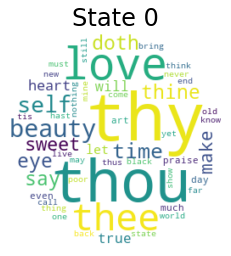

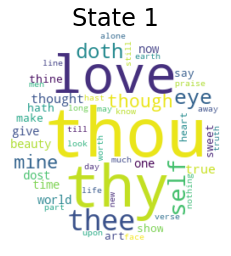

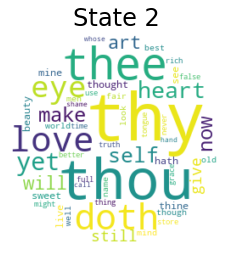

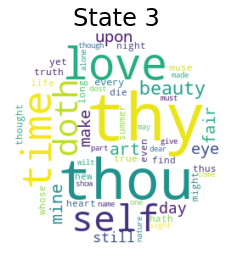

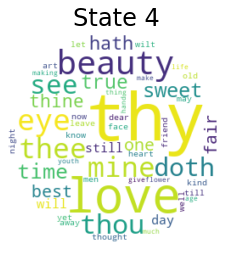

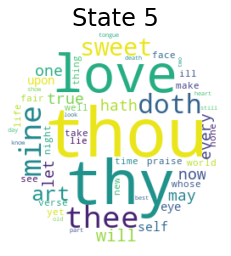

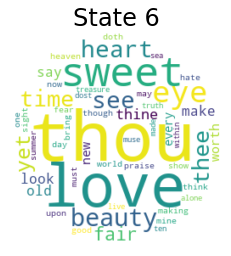

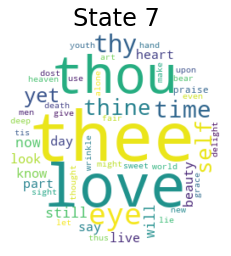

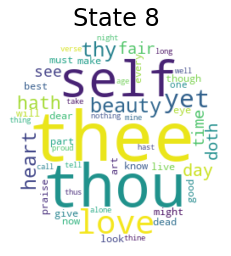

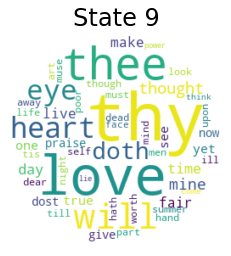

In [7]:
wordclouds = states_to_wordclouds(hmm, obs_map)

In [8]:
stats = get_stats(hmm, obs_map)

State 0
Nouns: 27.643133%
Verbs: 20.231823%
Pronouns: 8.102096%
Adjectives: 12.867346%
Adverbs: 6.849315%
Adpositions: 11.801897%
Conjunctions: 3.301721%
Determiners: 6.942981%
Cardinal Numbers: 0.351247%
Particles: 3.055848%
Other: 0.023416%
Punctuation: 0.187332%

{1: 6692, 3: 60, 2: 1244, 4: 20, 5: 2}
{'S': 5958, 'SUU': 91, 'SU': 901, 'US': 315, 'U': 755, 'SS': 38, 'USU': 93, 'SUSU': 15, 'SUS': 22, 'SSU': 1, 'USUU': 22, 'USUS': 3, 'UUSU': 1, 'UUS': 2, 'USUSU': 2}

State 1
Nouns: 27.103825%
Verbs: 20.048573%
Pronouns: 7.030965%
Adjectives: 11.718276%
Adverbs: 8.318154%
Adpositions: 13.381906%
Conjunctions: 2.064359%
Determiners: 8.864602%
Cardinal Numbers: 0.704311%
Particles: 1.845780%
Other: 0.036430%
Punctuation: 0.145719%

{1: 6523, 2: 1193, 3: 171, 4: 22}
{'S': 6028, 'US': 330, 'SU': 818, 'SS': 47, 'U': 521, 'USU': 97, 'SUSU': 7, 'SUU': 74, 'SUS': 28, 'USUU': 19, 'SSU': 2, 'SUUU': 1, 'USUS': 4, 'SSUS': 1}

State 2
Nouns: 26.848112%
Verbs: 17.234416%
Pronouns: 8.217735%
Adjective


Animating...


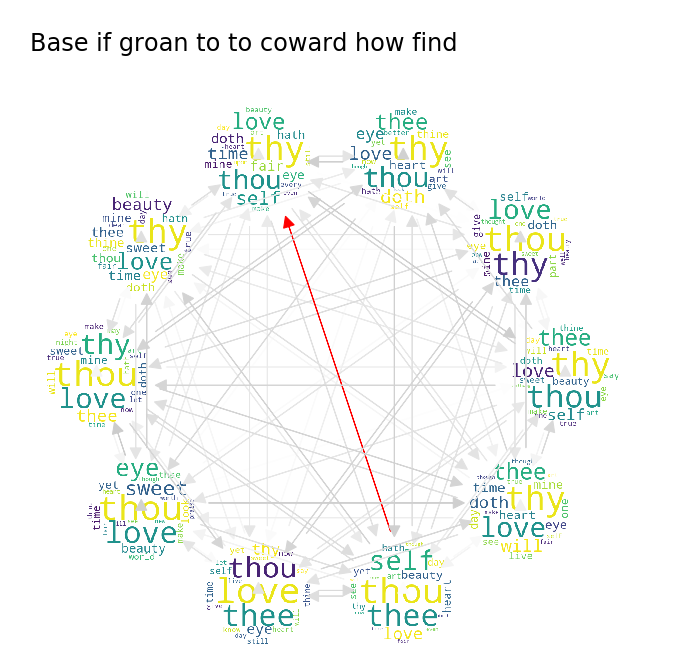

In [9]:
anim = animate_emission(hmm, obs_map, M=8)
HTML(anim.to_html5_video())

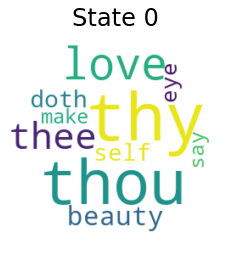

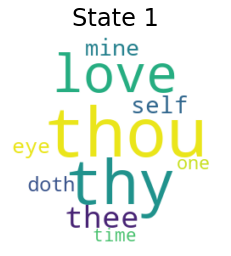

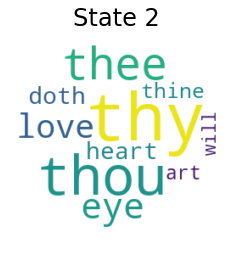

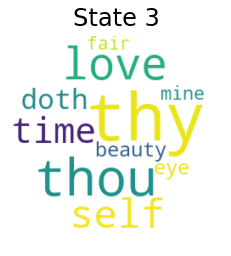

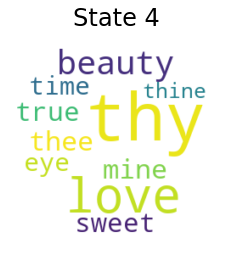

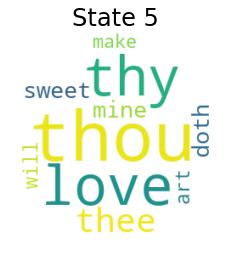

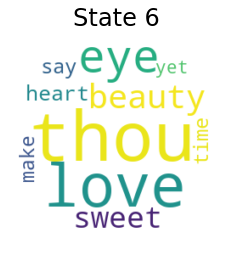

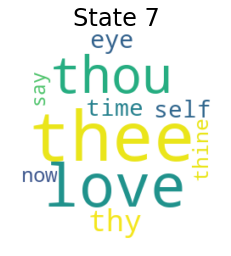

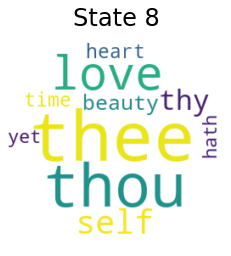

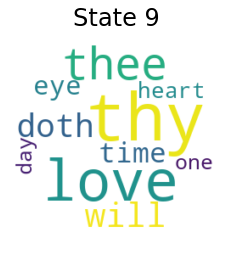

In [10]:
wordclouds = states_to_wordclouds(hmm, obs_map,max_words=10)